**Table of contents**<a id='toc0_'></a>    
- [Assessment 1: Data Science](#toc1_)    
      - [Submission](#toc1_1_1_1_)    
    - [Part 1: Demographic database](#toc1_1_2_)    
      - [Exercise 1: Population demographic within each region](#toc1_1_2_1_)    
    - [Part 2: Population database](#toc1_1_3_)    
      - [Exercise 2: Population change per decade](#toc1_1_3_1_)    
    - [Part 3: Ice cream sales](#toc1_1_4_)    
      - [Exercise 3](#toc1_1_4_1_)    
      - [Exercise 4](#toc1_1_4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Assessment 1: Data Science](#toc0_)

This test contains four exercises, which should all be attempted. For each exercise, the number of available marks is provided. For some exercises, additional marks are provided for "code clarity". These code clarity marks are awarded for concise, clear, efficient and well commented code.

Feel free to add code cells as required. Just make sure that your cells execute sequentially and that your answers are easy to read and understand.

#### <a id='toc1_1_1_1_'></a>[Submission](#toc0_)

Upload your completed Jupyter notebook (suffix ```.ipynb```) to the submission point on Blackboard. **No other formats will be accepted.**

**Important note**: A common issue is that students accidentally upload the template notebook. This happens because some editors do not autosave in the way that you may be used to from other applications. Please make sure to *save* your notebook before submission. *Double check that your file is the correct one by downloading it from Blackboard after submission and opening it on your computer. It is your responsibility to check that you have submitted the correct file.*

---

### <a id='toc1_1_2_'></a>[Part 1: Demographic database](#toc0_)

A database has been provided which contains country development indicators produced by United Nations Population Fund (UNFPA), adapted from the [World Population Dashboard](https://www.unfpa.org/data/world-population-dashboard). The SQLite database is called "SWOP-Data-2021.db" and details of the tables and columns can be found in ["README_SWOP-Data-2021.txt"](README_SWOP-Data-2021.txt).

This database contains multiple tables covering country demographics (population change, age of the population etc.), education level (population attending different levels of study) and regions of interest (e.g. "East and Southern Africa Region"). For each country entry this includes both the country name and the standard 2 or 3-letter reference code for the country (for reference see this [country codes list](https://www.nationsonline.org/oneworld/country_code_list.htm)).

#### <a id='toc1_1_2_1_'></a>[Exercise 1: Population demographic within each region](#toc0_)

The database contains national percentages of populations in a set of age ranges, e.g., the percentage of the population in a country aged 0 to 14, 15 to 64, etc. Countries can be grouped together into UNFPA regions, the definitions of which are provided. For each UNFPA region, calculate the mean percentage population (averaged percentage across countries within that region) in the 0 - 14 and 15 - 64 age ranges. Find the UNFPA region with the maximum ratio of mean national percentage populations in the 0 - 14 age range, compared to the 15 - 64 age (i.e., the maximum value of $\frac{population\_percent_{0 to 14}}{population\_percent_{15 to 64}}$). Print the region with the highest ratio, and the value of the ratio.

*(8 marks + 2 code clarity marks, maximum 10 marks)*

In [9]:
import pandas as pd

# Creating a dataframe to use by merging the tables population and region
population_df = pd.read_sql("SELECT * FROM demographic", f"sqlite:///{"SWOP-Data-2021.db"}")
regions_df = pd.read_sql("SELECT * FROM region", f"sqlite:///{"SWOP-Data-2021.db"}")

merged = pd.merge(population_df, regions_df, on="ISO3")

# Creates a dataframe with the mean population percentages by region
mean = merged.groupby("Region")[["Population_0to14_percent", "Population_15to64_percent"]].mean()

mean["ratio"] = mean["Population_0to14_percent"] / mean["Population_15to64_percent"]

# Finds the largest value of 'ratio' in the df and returns the corresponding row
largest = mean.loc[mean["ratio"].idxmax()]

# Outputs which region has the largest ratio and what the ratio value is.
print(f"The region with the largest ratio of population aged 0-14 to population ages 15-64 is {largest.name} with a ratio of {largest['ratio']:.2f}.")

The region with the largest ratio of population aged 0-14 to population ages 15-64 is West and Central Africa Region with a ratio of 0.74.


---

### <a id='toc1_1_3_'></a>[Part 2: Population database](#toc0_)


Another set of data has been provided which includes yearly population data from 1960 to 2020. The data within this file has been adapted from population data available from [The World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL).

Rather than being contained in an SQLite database, this is a csv file called "Country_Population_1960_2020.csv".

#### <a id='toc1_1_3_1_'></a>[Exercise 2: Population change per decade](#toc0_)

Using the data provided:

**(a)** Calculate the decadal (10 year) mean population for each country

**(b)** Use these decadal means to calculate the **percentage** population change for all countries between the decades of the 1960s (1960 - 1969, inclusive) and 2010s (2010 - 2019, inclusive).

**(c)** Print the percentage population change between 1960 and 2010 for Australia and India, and state which country had the largest relative population growth.

*(6 marks + 1 mark for code clarity, 7 marks total)*

In [10]:
## Part a

import pandas as pd

# Load the CSV file into a DataFrame
pop_change = pd.read_csv("Country_Population_1960_2020.csv")

# Convert the 'Year' column of the df to a numeric value
pop_change["Year"] = pd.to_datetime(pop_change["Year"], errors='coerce').dt.year

# Create a new column labeling the decade for each year
pop_change["Decade"] = pop_change["Year"] // 10 * 10

dec_means = pop_change.groupby("Decade").mean().drop(columns=["Year"])


#############
## Part b

# Creates series of the population means for the labelled decades
pop_1960 = dec_means.loc[1960]
pop_2010 = dec_means.loc[2010]

# Calculates the percentage change from 1960 to 2010
percent = ((pop_2010 - pop_1960) / pop_1960) * 100

pct_df = percent.reset_index()
pct_df.columns = ["Country", "Percentage Change"]
pct_df.set_index("Country", inplace=True)
pct_df

############
## Part c

# Extracts the rows for Australia and India
australia = pct_df.loc["AUS"]
india = pct_df.loc["IND"]

# Prints the results
print(f"Australia's population changed by {australia['Percentage Change']:.2f}% from 1960 to 2010.\n"
      f"India's population changed by {india['Percentage Change']:.2f}% from 1960 to 2010.\n")

if india['Percentage Change'] > australia['Percentage Change']:
    print(f"This shows that India's population grew by {india['Percentage Change'] - australia['Percentage Change']:.2f}% more than Australia's over this period.")

else:
    print(f"This shows that Australia's population grew by {australia['Percentage Change'] - india['Percentage Change']:.2f}% more than India's over this period.")


Australia's population changed by 109.94% from 1960 to 2010.
India's population changed by 162.98% from 1960 to 2010.

This shows that India's population grew by 53.03% more than Australia's over this period.


---

### <a id='toc1_1_4_'></a>[Part 3: Ice cream sales](#toc0_)

A data file, `icecream.csv`, has been provided which contains information on daily ice cream sales for a beach ice cream stall. The dataset contains the following information:
- average temperature of the day in &deg;C
- number of ice creams sold
- whether or not it rained on the day (1=True, 0=False)
- number of hours of sunshine on the day


#### <a id='toc1_1_4_1_'></a>[Exercise 3](#toc0_)

**(a)** Load the data from `icecream.csv` and print out a quick statistical summary of the dataset, making sure that the summary will include all variables. _(1 mark)_

**(b)** Print the correlation matrix between the variables in the dataset _(1 mark)_

**(c)** Programmatically access the correlation between ice cream sales and temperature, and print to the screen _(1 mark)_

*(3 marks)*

In [11]:
## Part a

import pandas as pd

icecream = pd.read_csv("icecream.csv")
print((icecream.dropna()).describe(), "\n\n")

## Part b

matrix = icecream.corr().round(3)
print(matrix, "\n\n")

## Part c

value = matrix.loc["ice_cream", "temp"]
print(f"The correlation coefficient between ice cream sales and temperature is {value}.\n\n")

             temp   ice_cream        rain     sun_hrs
count  100.000000  100.000000  100.000000  100.000000
mean    23.480000   84.920000    0.560000    9.040000
std      4.835642   16.621563    0.498888    3.504456
min     16.000000   52.000000    0.000000    3.000000
25%     19.000000   72.750000    0.000000    6.000000
50%     23.000000   82.500000    1.000000    9.000000
75%     27.000000   97.250000    1.000000   12.000000
max     32.000000  124.000000    1.000000   14.000000 


            temp  ice_cream   rain  sun_hrs
temp       1.000      0.876  0.021   -0.002
ice_cream  0.876      1.000 -0.136    0.426
rain       0.021     -0.136  1.000   -0.001
sun_hrs   -0.002      0.426 -0.001    1.000 


The correlation coefficient between ice cream sales and temperature is 0.876.




#### <a id='toc1_1_4_2_'></a>[Exercise 4](#toc0_)

The correlation matrix indicated a moderate positive correlation between number of hours of sun and number of ice cream sales, in addition to the higher correlation between temperature and ice cream sales. Let's see whether we can use **both** _temperature_ **and** _number of hours of sun_ to predict the number of ice cream sales. _Hint: This means that your training data will have two features._

**(a)** Using your model, predict the number of ice cream sales when temperature is 30.5 &deg;C **and** when there are 10.5 hours of sunshine. *(3 marks)*

**(b)** Plot your model against the data and comment on the results. *(3 marks)*

*(6 marks)*

   temp  ice_cream  rain  sun_hrs
0    22         85     0        9
1    30         96     1        6
2    26        105     0       13
3    23         93     0       10
4    22         79     0        7
Predicted ice cream sales for a day with 30.5°C and 10.5 hours of sunshine: 109.03




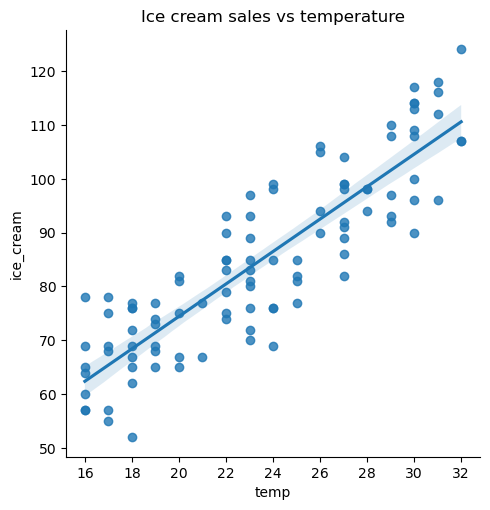

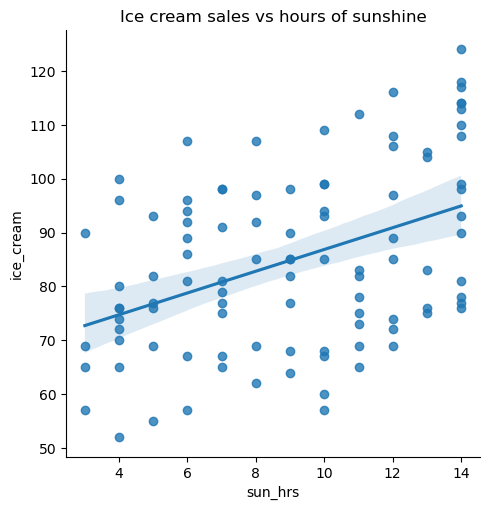

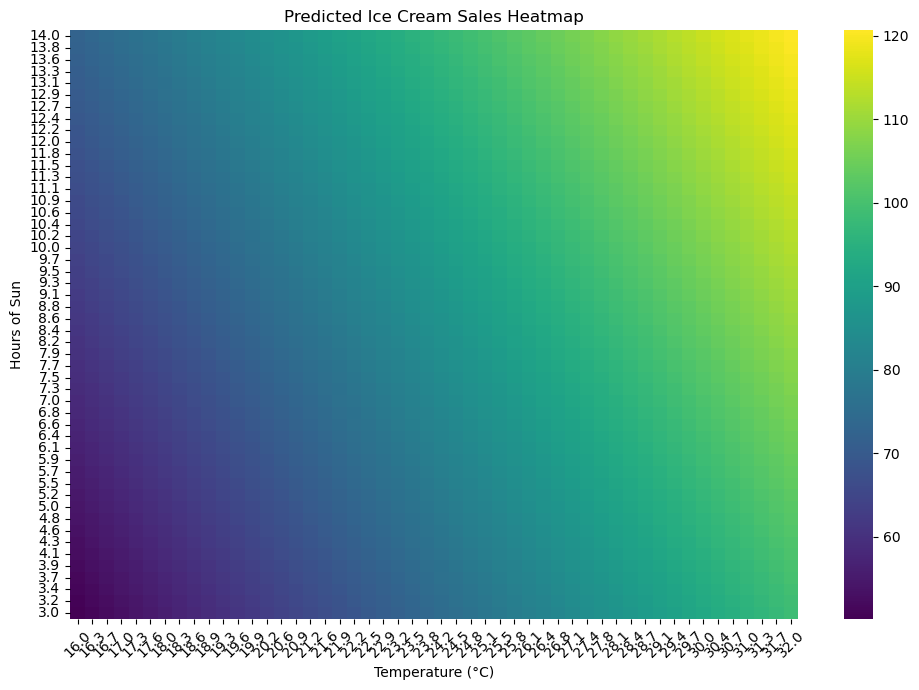

In [12]:
## Part a

import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(icecream.head())

x_ax = icecream[['temp', 'sun_hrs']]
y_ax = icecream['ice_cream']

model = linear_model.LinearRegression()
model.fit(x_ax, y_ax)

# Used to avoid warning messages due to mismatched names
new_data = pd.DataFrame({'temp': [30.5], 'sun_hrs': [10.5]})

# Prediction of the amount of ice cream sold
prediction = model.predict(new_data)
print(f"Predicted ice cream sales for a day with 30.5°C and 10.5 hours of sunshine: {prediction[0]:.2f}\n\n")

###############
## Part b

# Scatter plots with regression lines
sns.lmplot(x = 'temp', y = 'ice_cream', data = icecream)
plt.title("Ice cream sales vs temperature")
plt.show()

sns.lmplot(x = 'sun_hrs', y = 'ice_cream', data = icecream)
plt.title("Ice cream sales vs hours of sunshine")
plt.show()

# Heatmap creation

temp_range = np.linspace(icecream['temp'].min(), icecream['temp'].max(), 50)
sun_range = np.linspace(icecream['sun_hrs'].max(), icecream['sun_hrs'].min(), 50)

# Create a meshgrid
temp_grid, sun_grid = np.meshgrid(temp_range, sun_range)

# Create a grid for prediction
grid_points = pd.DataFrame({
    'temp': temp_grid.ravel(),
    'sun_hrs': sun_grid.ravel()
})

# Predict sales on the grid
predicted_sales = model.predict(grid_points).reshape(temp_grid.shape)

plt.figure(figsize=(10, 7))
sns.heatmap(predicted_sales, 
            xticklabels=np.round(temp_range, 1), 
            yticklabels=np.round(sun_range, 1), 
            cmap='viridis')

# Design heatmap
plt.xlabel("Temperature (°C)")
plt.ylabel("Hours of Sun")
plt.title("Predicted Ice Cream Sales Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The scatter graphs clearly illustrate the positive correlation between ice creams sold and temperature, hours of sun. By observing the graphs at the point where the temperature is 30.5 degrees and there is 10.5 hours of sun, it can be seen that the estimated amount of ice creams that would be sold with these conditions is slightly lower than the line of fit for each graph. This is due to the graphs only representing one of the two variables. The heatmap beneath the scatter graphs shows a prediction for when both variables are considered and when the values of 30.5 degrees and 10.5 hours overlap in this graph, the estimate of ice creams sold is closer to the one found in part a. 